# 6.2 Melbourne Housing Project - Exploring Relationships

### This script contains the following:

#### 1. Import libraries and data
#### 2. Exploring relationships
#### 3. Questions from data profiling that can be answered from this section of the analysis
#### 4. Questions from variable-relationships exploration
#### 5. Hypotheses

In [1]:
# Checking version of matplotlib. 
# If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.4.3


## 01. Import libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import cleaned data

path = r'C:\Users\Amy Yip\Desktop\Career Foundry Data Analytics\Achievement 6 Advanced Analytics and Dashboard Designs\07-05-2022 Melbourne Housing Analysis'

df_housing_cleaned = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '6.1_melb_housing_clean_data_new.pkl'))

In [4]:
df_housing_cleaned.head()

,Date Sold,Price,Year Built,Land Size,Property Area Size,Property Type,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Suburb,Postcode,Council Area,Council Area1,Latitude,Longitude,Region,Property Vicinity Count
1,3/12/2016,1480000.0,NaN,202.0,NaN,house/cottage/villa/terrace,2,1.0,1.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,4/02/2016,1035000.0,1900.0,156.0,79.0,house/cottage/villa/terrace,2,1.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,4/03/2017,1465000.0,1900.0,134.0,150.0,house/cottage/villa/terrace,3,2.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,4/03/2017,850000.0,NaN,94.0,NaN,house/cottage/villa/terrace,3,2.0,1.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,4/06/2016,1600000.0,2014.0,120.0,142.0,house/cottage/villa/terrace,4,1.0,2.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df_housing_cleaned.shape

(15359, 18)

## 02. Exploring relationships

### Correlations:

In [6]:
# Create a subset to keep only the variables you want in this section of the analysis

sub = df_housing_cleaned[['Price', 'Land Size', 'Property Area Size', 'Num of Rooms','Num of Bathrooms', 'Num of Car Spaces', 'Distance to CBD',
         'Property Vicinity Count',]]

In [7]:
# Create a correlation matrix using pandas

sub.corr()

,Price,Land Size,Property Area Size,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Property Vicinity Count
Price,1.000000,0.205007,0.468103,0.381226,0.406002,0.139028,-0.338449,-0.035937
Land Size,0.205007,1.000000,0.308868,0.362349,0.160775,0.345433,0.327948,-0.013362
Property Area Size,0.468103,0.308868,1.000000,0.564456,0.548195,0.270304,0.076487,-0.030985
Num of Rooms,0.381226,0.362349,0.564456,1.000000,0.593896,0.334367,0.191297,-0.035980
Num of Bathrooms,0.406002,0.160775,0.548195,0.593896,1.000000,0.264563,0.091212,-0.032991
Num of Car Spaces,0.139028,0.345433,0.270304,0.334367,0.264563,1.000000,0.206671,0.001560
Distance to CBD,-0.338449,0.327948,0.076487,0.191297,0.091212,0.206671,1.000000,0.034439
Property Vicinity Count,-0.035937,-0.013362,-0.030985,-0.035980,-0.032991,0.001560,0.034439,1.000000


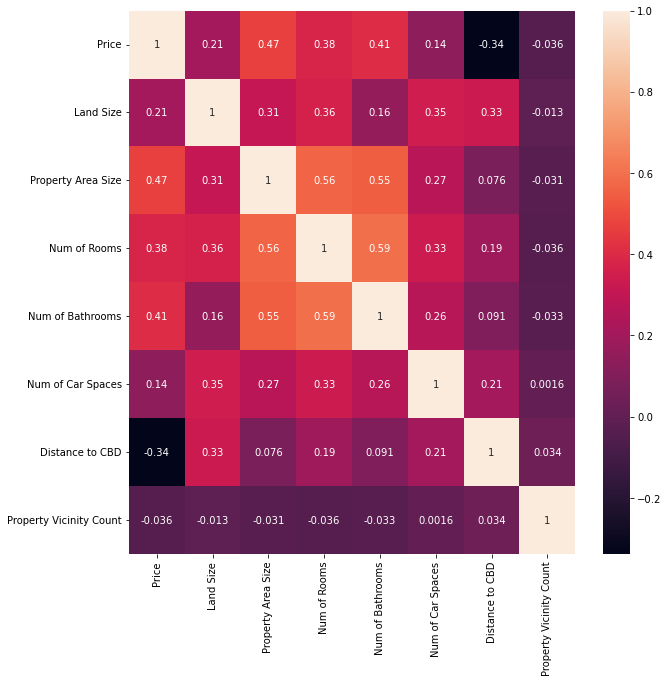

In [8]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

##### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

The coefficients represents the strengths of the correlation.

0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship

Heatmap takes every variable and crosses it with each and every other variable. This means you’ll have cases where a variable is crossed with itself, which, naturally, will show a perfect positive correlation, thus producing the diagonal of 1s. 

Purple equates to 0, or no relationship between the variables, dark purple and black equate to negative correlations, and orange and light orange equate to positive correlations.

It has been observed that property area size, number of bathrooms, and number of rooms have moderate positive correlations with price, 0.47, 0.41, 0.38 respectively. The positive correlation is reasonable because property prices are typically higher as the property size, bathroom and room numbers increase.

In contrast, there is a negative correlation between distance to CBD and price of -0.34, which is logical as property prices are generally dearer the closer they are to the CBD.

On the other hand, land size and number of car spaces have weak positive correlations with price, meaning these variables have low impact on price. Meanwhile, number of properties within the vicinity has near zero impact on price.

### Scatterplots:

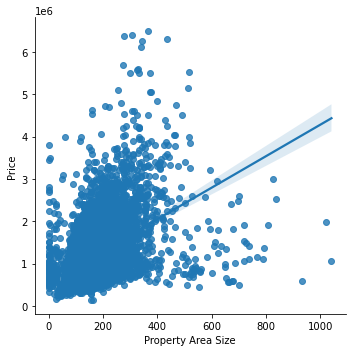

In [9]:
# Create a scatterplot for the "Property" and "Price" columns in seaborn

sns.lmplot(x = 'Property Area Size', y = 'Price', data = df_housing_cleaned)

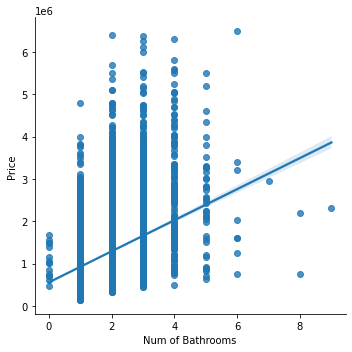

In [10]:
# Create a scatterplot for the "Num of Bathrooms" and "Price" columns in seaborn

sns.lmplot(x = 'Num of Bathrooms', y = 'Price', data = df_housing_cleaned)

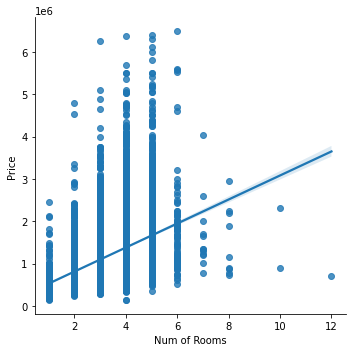

In [11]:
# Create a scatterplot for the "Num of Rooms" and "Price" columns in seaborn

sns.lmplot(x = 'Num of Rooms', y = 'Price', data = df_housing_cleaned)

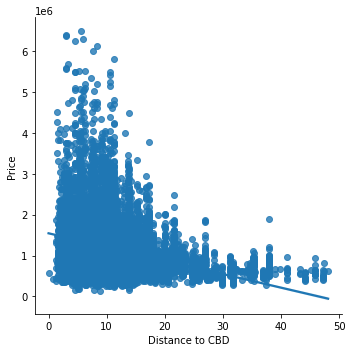

In [12]:
# Create a scatterplot for the "Distance to CBD" and "Price" columns in seaborn

sns.lmplot(x = 'Distance to CBD', y = 'Price', data = df_housing_cleaned)

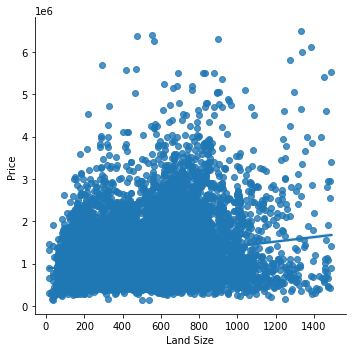

In [13]:
# Create a scatterplot for the "Land Size" and "Price" columns in seaborn

sns.lmplot(x = 'Land Size', y = 'Price', data = df_housing_cleaned)

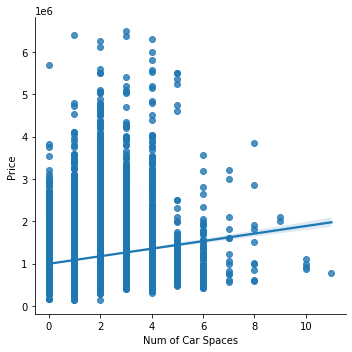

In [14]:
# Create a scatterplot for the "Num of Car Spaces" and "Price" columns in seaborn

sns.lmplot(x = 'Num of Car Spaces', y = 'Price', data = df_housing_cleaned)

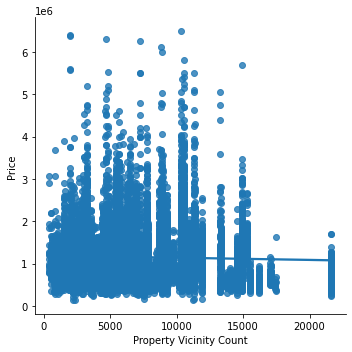

In [15]:
# Create a scatterplot for the "Property Vicinity Count" and "Price" columns in seaborn

sns.lmplot(x = 'Property Vicinity Count', y = 'Price', data = df_housing_cleaned)

#### Examine the nature of their relationships.

Property area size, number of bathrooms and rooms have a moderate positive correlation with price. This means as the Property area size, number of bathrooms and rooms increase, the price would also increase.

Distance to CBD has a moderate negative correlation with price which means as the properties are closer to CBD, the price would also increase.

Land size and number of car spaces have a weak positive correlation with price as represented by small steepness of he slope. This means as land size and number of car spaces increase, the price would also increase.

Property vicinity count has no relationship with price as indicated by the slope of the line where it is horizontal.

### Pair Plots:

In [16]:
df_housing_cleaned.columns

Index(['Date Sold', 'Price', 'Year Built', 'Land Size', 'Property Area Size',
       'Property Type', 'Num of Rooms', 'Num of Bathrooms',
       'Num of Car Spaces', 'Distance to CBD', 'Suburb', 'Postcode',
       'Council Area', 'Council Area1', 'Latitude', 'Longitude', 'Region',
       'Property Vicinity Count'],
      dtype='object')

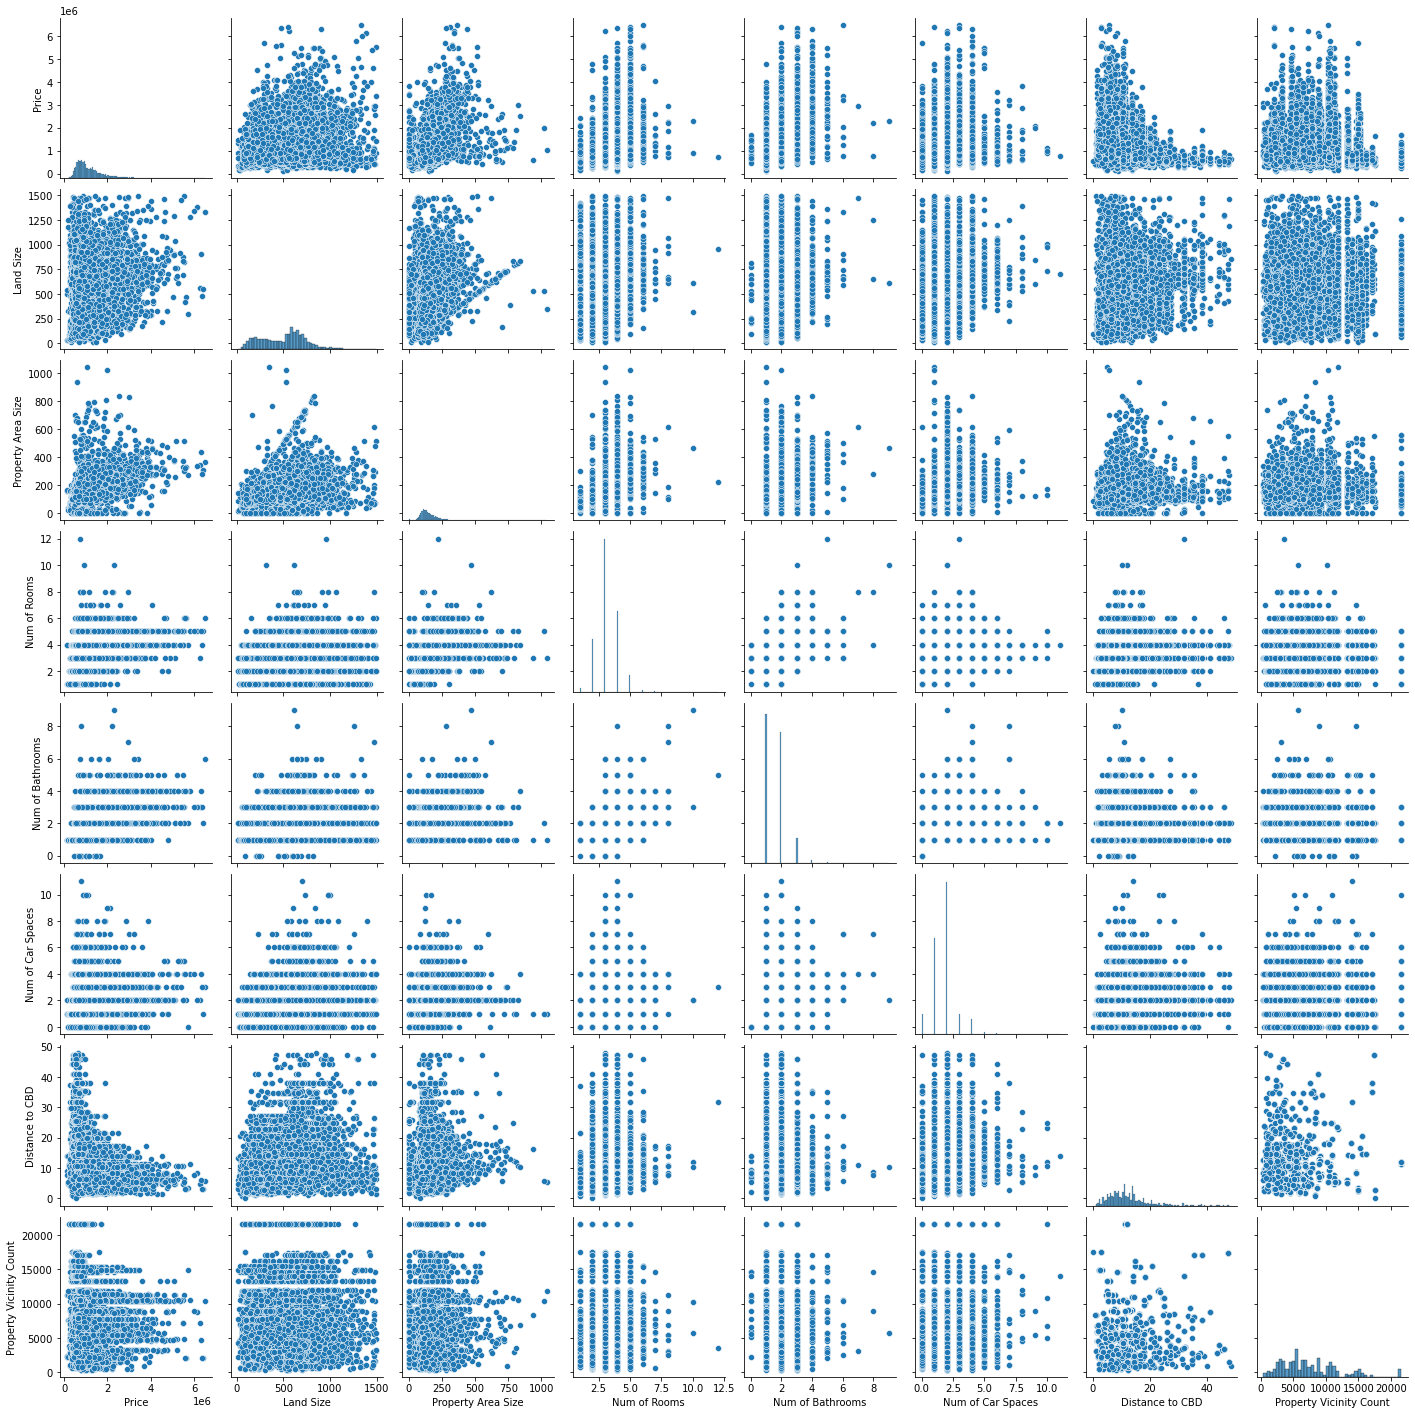

In [17]:
# Create a pair plot 

g = sns.pairplot(sub)

#### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

There are some properties with large number of rooms and bathrooms that have  low prices. It will be interesting to see if the high prices may be due to the location as the suburb and distance from CBD and train station can also potentially impact the pricing.

There are also high prices with for low to moderate land size properties. I will need to explore what type of properties they are, what is the property size on the land, are they million dollar properties, are they located in the city?

### Categorical Plots:

##### Creating a categorical variable that splits the "SoldPrice" column into categories

<AxesSubplot:xlabel='Price', ylabel='Count'>

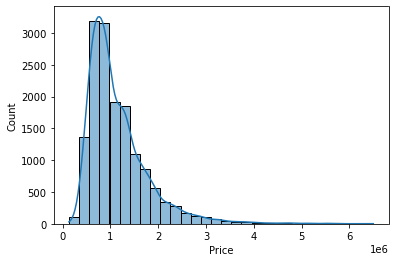

In [18]:
# Use a histogram to visualize the distribution of the variables.
# This way, sensible categories for the price ranges can be determined.
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_housing_cleaned['Price'], bins = 30, kde = True)

In [19]:
# Determining sensible categories for the price ranges.

df_housing_cleaned.loc[df_housing_cleaned['Price'] < 750000, 'PriceCategory'] = 'Low price'
df_housing_cleaned.loc[(df_housing_cleaned['Price'] >= 750000) & (df_housing_cleaned['Price'] < 2000000), 'PriceCategory'] = 'Middle price'
df_housing_cleaned.loc[df_housing_cleaned['Price'] >= 2000000, 'PriceCategory'] = 'High price'

In [20]:
df_housing_cleaned['PriceCategory'].value_counts(dropna = False)

Middle price    9641
Low price       4316
High price      1402
Name: PriceCategory, dtype: int64

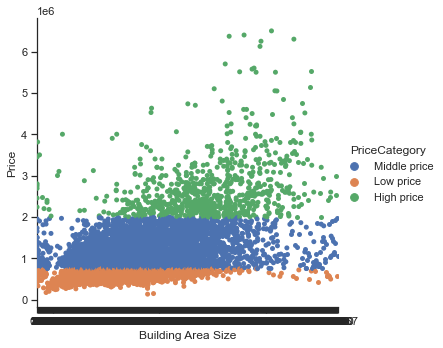

In [49]:
# Create a categorical plot in seaborn using the price categories created above
# Note: Building Area Size is the Propery Area Size. Will need to rerun this command later.

sns.set(style="ticks")
g = sns.catplot(x="Building Area Size", y="Price", hue="PriceCategory", data=df_housing_cleaned)

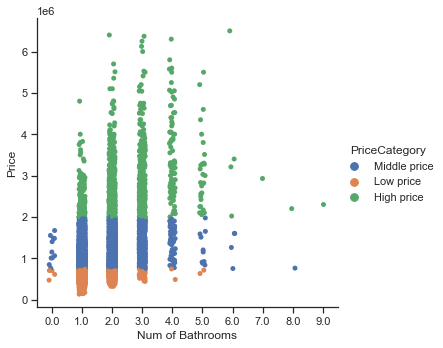

In [50]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Num of Bathrooms", y="Price", hue="PriceCategory", data=df_housing_cleaned)

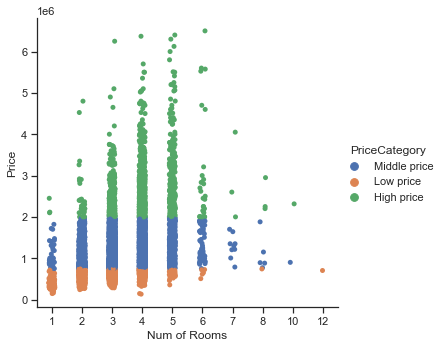

In [46]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Num of Rooms", y="Price", hue="PriceCategory", data=df_housing_cleaned)

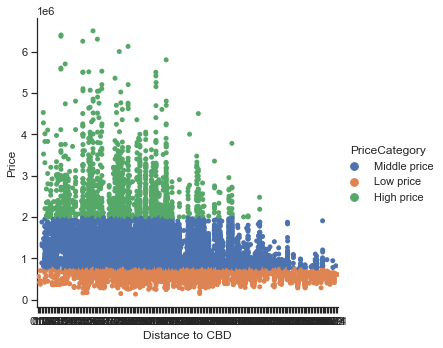

In [48]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Distance to CBD", y="Price", hue="PriceCategory", data=df_housing_cleaned)

#### Interpret results

Low property prices are common with 4 bedroom properties. There are only very few cases where the price is low for properties with the highest number of bedrooms. 

Properties were sold at high prices regardless of the bedroom numbers. It can be observed that 4 to 5 bedrooms were commonly sold at high price, while the frequency is reduced for greater bedroom numbers. This is as expected as large bedroom number properties are uncommon.

The frequency of highly priced properties also reduces with bedroom numbers. This behaviour is logical as generally the size of property would also reduce with less bedrooms, and therefore it can be suspected that the pricing would also be lower.

Properties were generally sold at middle price as observed from the spread of data points.

## 03. Questions from data profiling that can be answered from this section of the analysis:

##### - Does the number of bedrooms, bathrooms, and car spaces affect property price?

Number of bedrooms and bathrooms have moderate positive correlations with the price as observed from the variable-relationships exploration within this analysis.

On the other hand, car space numbers have very little correlation with price.

##### - Do similar properties in terms of number of bedrooms, bathrooms, and car spaces also result in similar property price?

No, it can be observed from the correlation plots that price varies from low to high price range regardless of the bedroom, bathroom, and car space numbers.

## 04. Questions from variable-relationships exploration:

- What other factors impact on property prices?
- What factors have the most impact on property prices?
- Will property location such as suburb, region, Local Government Area (LGA) affect property prices?
- How does the property value change in different regions?
- How does the property value changed over time?

## 05. Hypotheses

- If the property area size is large, then the property price will increase.
- If the property has high number of rooms, then the property price will increase.
- If the property has high number of bathrooms, then the property price will increase.
- If the property's distance from the city is small, then the property price will increase.
- If the property age is large, then the property price will increase.